# 11장 Time Series

In [ ]:
#time series is formed by some records that are recorded repeatedly at many points in time

#time series that have fixed frequency: data points occur at regular intervals according to some rule, ex= every 5 minutes

#irregular time series: without fixed unit of time or offset between units

how we mark and refer to time series data depnds on:
- timestamps: specific instants in time    
- fixed periods
- intervals of time
- Experiment or elapsed time


In [1]:
import numpy as np
import pandas as pd

## 11.1 Date and Time Data Types and Tools

In [3]:
from datetime import datetime

now=datetime.now()

now

datetime.datetime(2023, 1, 21, 22, 39, 20, 469339)

In [5]:
now.year, now.month, now.day

(2023, 1, 21)

In [ ]:
#datetime.timedelta => timedelta

In [6]:
delta= datetime (2011, 1, 7) -datetime(2008, 6, 24, 8, 15) #year, month, day, hour, minute, second,...

delta

datetime.timedelta(days=926, seconds=56700)

In [7]:
delta.days

926

In [10]:
delta.seconds

56700

In [12]:
from datetime import timedelta

start= datetime(2011,1,7)

start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [13]:
start - 2 * timedelta(12) #difference between two datetime values

datetime.datetime(2010, 12, 14, 0, 0)

In [14]:
timedelta(12) => 0:00:12

datetime.timedelta(days=12)

###### 11.1.1 Converting Between String and Datetime

In [16]:
stamp = datetime(2011, 1, 3)

str(stamp)

'2011-01-03 00:00:00'

In [17]:
stamp.strftime("%Y-%m-%d")

'2011-01-03'

In [18]:
value = "2011-01-03"

datetime.strptime(value, "%Y-%m-%d") #can use many of the same format codes to convert strings and ates using strptime

datetime.datetime(2011, 1, 3, 0, 0)

In [19]:
datestrs = ["7/6/2011", "8/6/2011"]

[datetime.strptime(x, "%m/%d/%Y") for x in datestrs] #.strptime is one way to parse a date with a known format

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [20]:
#pandas.to_datetime method parses many different kinds of date representations.

datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]

pd.to_datetime(datestrs)
    

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [21]:
#also handles values that should be considered missing

idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [22]:
idx[2] #Nat (Not a Time) is pandas's null value for time-stamp data

NaT

In [23]:
pd.isna(idx)

array([False, False,  True])

## 11.2 Time Series Basics

In [24]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.standard_normal(6), index=dates)
ts

2011-01-02    0.725710
2011-01-05    0.740336
2011-01-07    1.204665
2011-01-08    0.092522
2011-01-10    0.814767
2011-01-12    2.624051
dtype: float64

In [25]:
ts.index #datetime objects have been put in a datetimeindex

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [26]:
ts + ts[::2]

2011-01-02    1.451420
2011-01-05         NaN
2011-01-07    2.409330
2011-01-08         NaN
2011-01-10    1.629535
2011-01-12         NaN
dtype: float64

In [27]:
ts[::2] #selects every second element in ts

2011-01-02    0.725710
2011-01-07    1.204665
2011-01-10    0.814767
dtype: float64

In [29]:
ts.index.dtype

dtype('<M8[ns]')

In [30]:
stamp=ts.index[0]

stamp

Timestamp('2011-01-02 00:00:00')

###### 11.2.1 Indexing, Selection, Subsetting

In [31]:
stamp =ts.index[2]
stamp

Timestamp('2011-01-07 00:00:00')

In [32]:
ts[stamp]

1.2046651097072008

In [33]:
ts["2011-01-10"]

0.8147674223720353

In [34]:
longer_ts = pd.Series(np.random.standard_normal(1000),
                      index=pd.date_range("2000-01-01", periods=1000))

longer_ts

2000-01-01   -0.689183
2000-01-02    1.647350
2000-01-03    0.505722
2000-01-04    0.136209
2000-01-05   -0.685116
                ...   
2002-09-22   -0.177609
2002-09-23   -0.869477
2002-09-24   -0.891454
2002-09-25   -0.562129
2002-09-26    1.195165
Freq: D, Length: 1000, dtype: float64

In [35]:
longer_ts['2001'] #2001 is interpreted as a year and selects that time period

2001-01-01   -1.727242
2001-01-02   -1.325260
2001-01-03    1.037234
2001-01-04    0.338015
2001-01-05    0.882145
                ...   
2001-12-27    1.243932
2001-12-28    0.200911
2001-12-29   -1.652506
2001-12-30    1.121157
2001-12-31    1.442087
Freq: D, Length: 365, dtype: float64

In [36]:
longer_ts["2001-05"]

2001-05-01   -1.083542
2001-05-02    0.231546
2001-05-03    0.350813
2001-05-04   -0.029709
2001-05-05   -0.202082
2001-05-06   -0.546310
2001-05-07    1.451088
2001-05-08    0.455409
2001-05-09   -0.193276
2001-05-10   -0.799656
2001-05-11    0.683217
2001-05-12   -0.528196
2001-05-13   -0.040097
2001-05-14    0.789138
2001-05-15    0.758517
2001-05-16    0.705675
2001-05-17    1.816233
2001-05-18   -0.317611
2001-05-19   -0.571357
2001-05-20   -1.147947
2001-05-21   -0.407079
2001-05-22   -0.060952
2001-05-23    0.517504
2001-05-24   -0.426166
2001-05-25   -0.966852
2001-05-26    1.491424
2001-05-27    0.431271
2001-05-28   -0.683146
2001-05-29    1.545995
2001-05-30   -0.315530
2001-05-31   -0.114307
Freq: D, dtype: float64

In [37]:
#slicing with datetime

ts[datetime(2011, 1, 7):]

2011-01-07    1.204665
2011-01-08    0.092522
2011-01-10    0.814767
2011-01-12    2.624051
dtype: float64

In [38]:
longer_ts["2001-05-01":]

2001-05-01   -1.083542
2001-05-02    0.231546
2001-05-03    0.350813
2001-05-04   -0.029709
2001-05-05   -0.202082
                ...   
2002-09-22   -0.177609
2002-09-23   -0.869477
2002-09-24   -0.891454
2002-09-25   -0.562129
2002-09-26    1.195165
Freq: D, Length: 514, dtype: float64

In [39]:
ts[datetime(2011, 1, 7):datetime(2011, 1, 10)]

2011-01-07    1.204665
2011-01-08    0.092522
2011-01-10    0.814767
dtype: float64

In [40]:
#most time series data is ordered chronologically => can slice with timestamps not contained in a time series to perform a range query

ts

2011-01-02    0.725710
2011-01-05    0.740336
2011-01-07    1.204665
2011-01-08    0.092522
2011-01-10    0.814767
2011-01-12    2.624051
dtype: float64

In [41]:
ts["2011-01-06":"2011-01-11"]

2011-01-07    1.204665
2011-01-08    0.092522
2011-01-10    0.814767
dtype: float64

In [42]:
#truncate => slices a series between two dates

ts.truncate(after="2011-01-09")

2011-01-02    0.725710
2011-01-05    0.740336
2011-01-07    1.204665
2011-01-08    0.092522
dtype: float64

In [44]:
dates = pd.date_range("2000-01-01", periods=100, freq="W-WED")

long_df = pd.DataFrame(np.random.standard_normal((100, 4)),
                       index=dates,
                       columns=["Colorado", "Texas",
                                "New York", "Ohio"])

long_df.loc["2001-05"]

,Colorado,Texas,New York,Ohio
2001-05-02,-0.026042,-1.532715,1.146967,0.252596
2001-05-09,0.583958,0.973932,-0.010670,-0.667157
2001-05-16,3.064016,2.365957,1.073266,1.289617
2001-05-23,1.093919,0.086299,-1.769262,1.183625
2001-05-30,-0.758976,0.442969,0.261708,0.728587


###### 11.2.2 Time Series with Duplicated Indices

In [46]:
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02",
                          "2000-01-02", "2000-01-03"])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [47]:
#check if index is unique

dup_ts.index.is_unique

False

In [48]:
dup_ts["2000-01-03"]  # not duplicated

4

In [49]:
dup_ts["2000-01-02"]  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [50]:
#aggregate data having nonunique timestamps

grouped = dup_ts.groupby(level=0)

grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [51]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3 Date Ranges, Frequencies, and Shifting

In [53]:
ts

2011-01-02    0.725710
2011-01-05    0.740336
2011-01-07    1.204665
2011-01-08    0.092522
2011-01-10    0.814767
2011-01-12    2.624051
dtype: float64

In [55]:
resampler=ts.resample("D") #"D" is interpreted as daily frequency

resampler

###### 11.3.1 Generating Date Ranges

In [57]:
index = pd.date_range("2012-04-01", "2012-06-01")

index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [59]:
#pandas.date_range generates daily timestamps

pd.date_range(start="2012-04-01", periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [60]:
pd.date_range(end="2012-06-01", periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [61]:
pd.date_range("2000-01-01", "2000-12-01", freq="BM") #business end of month

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [62]:
#pandas.date_range by default preserves the time (if any) of the start or end timestamp

pd.date_range("2012-05-02 12:56:31", periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

###### 11.3.2 Frequencies and Date Offsets

In [64]:
from pandas.tseries.offsets import Hour, Minute

hour = Hour() #hourly frequency represented with Hour class

hour

<Hour>

In [66]:
four_hours = Hour(4)

four_hours

<4 * Hours>

In [67]:
pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H") #freq에 4H

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [68]:
Hour(2) + Minute(30)

<150 * Minutes>

In [69]:
pd.date_range("2000-01-01", periods=10, freq="1h30min")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

###### Week of month dates

In [71]:
#frequency class WOM that enables to get dates like 매달 세번째 금요일

monthly_dates = pd.date_range("2012-01-01", "2012-09-01", freq="WOM-3FRI")

list(monthly_dates)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

###### 11.3.3 Shifting (Leading and Lagging) Data

In [72]:
ts = pd.Series(np.random.standard_normal(4),
               index=pd.date_range("2000-01-01", periods=4, freq="M"))

ts

2000-01-31    1.226911
2000-02-29    1.209476
2000-03-31    0.369512
2000-04-30    0.495395
Freq: M, dtype: float64

In [73]:
ts.shift(2) #shift method doing shift foward or back

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.226911
2000-04-30    1.209476
Freq: M, dtype: float64

In [74]:
ts.shift(-2)

2000-01-31    0.369512
2000-02-29    0.495395
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [75]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -0.014210
2000-03-31   -0.694486
2000-04-30    0.340672
Freq: M, dtype: float64

In [76]:
ts.shift(2, freq="M")

2000-03-31    1.226911
2000-04-30    1.209476
2000-05-31    0.369512
2000-06-30    0.495395
Freq: M, dtype: float64

In [77]:
ts.shift(3, freq="D")

2000-02-03    1.226911
2000-03-03    1.209476
2000-04-03    0.369512
2000-05-03    0.495395
dtype: float64

In [78]:
ts.shift(1, freq="90T") #T stands for minute

2000-01-31 01:30:00    1.226911
2000-02-29 01:30:00    1.209476
2000-03-31 01:30:00    0.369512
2000-04-30 01:30:00    0.495395
dtype: float64

###### Shifting dates with offsets

In [79]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011, 11, 17)

now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [80]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [82]:
now + MonthEnd(3)

Timestamp('2012-01-31 00:00:00')

In [83]:
offset = MonthEnd()

In [84]:
 offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [85]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [89]:
ts = pd.Series(np.random.standard_normal(20),
               index=pd.date_range("2000-01-15", periods=20, freq="4D"))

ts

2000-01-15   -0.765998
2000-01-19    0.018349
2000-01-23    0.222134
2000-01-27   -0.720153
2000-01-31    0.609508
2000-02-04   -0.137666
2000-02-08   -1.557173
2000-02-12    0.016468
2000-02-16    0.192989
2000-02-20   -0.364213
2000-02-24   -0.432887
2000-02-28    2.012606
2000-03-03   -0.434549
2000-03-07   -1.400506
2000-03-11    0.972851
2000-03-15    0.292786
2000-03-19    1.601278
2000-03-23    0.606969
2000-03-27    0.434783
2000-03-31    1.231878
Freq: 4D, dtype: float64

In [90]:
ts.groupby(MonthEnd().rollforward).mean()

2000-01-31   -0.127232
2000-02-29   -0.038554
2000-03-31    0.413186
dtype: float64

In [91]:
ts.resample("M").mean() #using resample

2000-01-31   -0.127232
2000-02-29   -0.038554
2000-03-31    0.413186
Freq: M, dtype: float64

## 11.4 Time Zone Handling

In [92]:
import pytz

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [93]:
tz = pytz.timezone("America/New_York")

tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

###### 11.4.1 Time Zone Localization and conversion

In [94]:
dates = pd.date_range("2012-03-09 09:30", periods=6)

ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)

ts

2012-03-09 09:30:00   -0.168531
2012-03-10 09:30:00   -0.713659
2012-03-11 09:30:00    1.015122
2012-03-12 09:30:00    0.166584
2012-03-13 09:30:00    1.004065
2012-03-14 09:30:00   -0.789301
Freq: D, dtype: float64

In [95]:
print(ts.index.tz)

None


In [96]:
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC")

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [97]:
ts

2012-03-09 09:30:00   -0.168531
2012-03-10 09:30:00   -0.713659
2012-03-11 09:30:00    1.015122
2012-03-12 09:30:00    0.166584
2012-03-13 09:30:00    1.004065
2012-03-14 09:30:00   -0.789301
Freq: D, dtype: float64

In [98]:
ts_utc = ts.tz_localize("UTC") #conversion from naive to localized, 현재의 시간을 시간대로 현지화 하기

ts_utc

2012-03-09 09:30:00+00:00   -0.168531
2012-03-10 09:30:00+00:00   -0.713659
2012-03-11 09:30:00+00:00    1.015122
2012-03-12 09:30:00+00:00    0.166584
2012-03-13 09:30:00+00:00    1.004065
2012-03-14 09:30:00+00:00   -0.789301
Freq: D, dtype: float64

In [99]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [101]:
ts_utc.tz_convert("America/New_York") #converted to another time zone

2012-03-09 04:30:00-05:00   -0.168531
2012-03-10 04:30:00-05:00   -0.713659
2012-03-11 05:30:00-04:00    1.015122
2012-03-12 05:30:00-04:00    0.166584
2012-03-13 05:30:00-04:00    1.004065
2012-03-14 05:30:00-04:00   -0.789301
Freq: D, dtype: float64

In [102]:
ts_eastern = ts.tz_localize("America/New_York")

ts_eastern.tz_convert("UTC")

2012-03-09 14:30:00+00:00   -0.168531
2012-03-10 14:30:00+00:00   -0.713659
2012-03-11 13:30:00+00:00    1.015122
2012-03-12 13:30:00+00:00    0.166584
2012-03-13 13:30:00+00:00    1.004065
2012-03-14 13:30:00+00:00   -0.789301
dtype: float64

In [103]:
ts_eastern.tz_convert("Europe/Berlin")

2012-03-09 15:30:00+01:00   -0.168531
2012-03-10 15:30:00+01:00   -0.713659
2012-03-11 14:30:00+01:00    1.015122
2012-03-12 14:30:00+01:00    0.166584
2012-03-13 14:30:00+01:00    1.004065
2012-03-14 14:30:00+01:00   -0.789301
dtype: float64

In [104]:
#tz_localize and tz_convert are also instance methods on DatetimeIndex

ts.index.tz_localize("Asia/Shanghai")

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

###### 11.4.2 Operations with Time Zone-Aware Timestamp Objects

In [105]:
stamp = pd.Timestamp("2011-03-12 04:00")

stamp_utc = stamp.tz_localize("utc")

stamp_utc.tz_convert("America/New_York")

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [106]:
stamp_moscow = pd.Timestamp("2011-03-12 04:00", tz="Europe/Moscow")

stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [107]:
stamp_utc.value #changing timezone does not alter the internal UTC value

1299902400000000000

In [108]:
stamp_utc.tz_convert("America/New_York").value

1299902400000000000

In [ ]:
#Daylight Saving Time (DST) => 가을에는 한시간 뒤로 미루기, 봄에는 한시간 추가해서 보기

In [205]:
stamp = pd.Timestamp("2012-03-11 01:30", tz="US/Eastern")

stamp

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [206]:
stamp+Hour() #봄에는 한시간 추가

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [216]:
stamp = pd.Timestamp("2012-11-04 00:30", tz="US/Eastern")

stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [217]:
stamp+2*Hour() #가을에는 한시간 뒤로

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

###### 11.4.3 Operations Between Different Time Zones

In [111]:
dates = pd.date_range("2012-03-07 09:30", periods=10, freq="B")

ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)

ts

2012-03-07 09:30:00   -0.285666
2012-03-08 09:30:00   -1.120525
2012-03-09 09:30:00    1.371808
2012-03-12 09:30:00    0.798324
2012-03-13 09:30:00   -0.539674
2012-03-14 09:30:00    0.392996
2012-03-15 09:30:00    0.237782
2012-03-16 09:30:00   -0.488589
2012-03-19 09:30:00    0.731637
2012-03-20 09:30:00   -0.803211
Freq: B, dtype: float64

In [113]:
ts1 = ts[:7].tz_localize("Europe/London")

ts1

2012-03-07 09:30:00+00:00   -0.285666
2012-03-08 09:30:00+00:00   -1.120525
2012-03-09 09:30:00+00:00    1.371808
2012-03-12 09:30:00+00:00    0.798324
2012-03-13 09:30:00+00:00   -0.539674
2012-03-14 09:30:00+00:00    0.392996
2012-03-15 09:30:00+00:00    0.237782
dtype: float64

In [114]:
ts2 = ts1[2:].tz_convert("Europe/Moscow")

ts2

2012-03-09 13:30:00+04:00    1.371808
2012-03-12 13:30:00+04:00    0.798324
2012-03-13 13:30:00+04:00   -0.539674
2012-03-14 13:30:00+04:00    0.392996
2012-03-15 13:30:00+04:00    0.237782
dtype: float64

In [116]:
result = ts1 + ts2

result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## 11.5 Periods and Period Arithmetic

In [117]:
p = pd.Period("2011", freq="A-DEC")

p

Period('2011', 'A-DEC')

In [118]:
p+5

Period('2016', 'A-DEC')

In [119]:
p-2

Period('2009', 'A-DEC')

In [120]:
pd.Period("2014", freq="A-DEC") - p

<3 * YearEnds: month=12>

In [122]:
periods = pd.period_range("2000-01-01", "2000-06-30", freq="M")

periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [123]:
pd.Series(np.random.standard_normal(6), index=periods)

2000-01   -0.171075
2000-02    0.562138
2000-03    0.025020
2000-04    0.192304
2000-05   -0.488207
2000-06   -0.523321
Freq: M, dtype: float64

In [124]:
values = ["2001Q3", "2002Q2", "2003Q1"]

index = pd.PeriodIndex(values, freq="Q-DEC")

index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

###### Period Frequency Conversion

In [125]:
p = pd.Period("2011", freq="A-DEC")

p

Period('2011', 'A-DEC')

In [126]:
p.asfreq("M", how="start") #asfreq converts to another frequency

Period('2011-01', 'M')

In [127]:
p.asfreq("M", how="end")

Period('2011-12', 'M')

In [128]:
p.asfreq("M")

Period('2011-12', 'M')

In [129]:
p = pd.Period("2011", freq="A-JUN") #A 다음 달은 해당 연도의 달을 끝으로 가는 12달 을 보여준다 ,,, jun 이 끝이니까 시작은 jul부터

p

Period('2011', 'A-JUN')

In [130]:
p.asfreq("M", how="start")

Period('2010-07', 'M')

In [131]:
p.asfreq("M", how="end")

Period('2011-06', 'M')

In [132]:
p = pd.Period("Aug-2011", "M")

p.asfreq("A-JUN")

Period('2012', 'A-JUN')

In [133]:
#PeriodIndex objects or time series can be similarly converted with the same semantics
periods = pd.period_range("2006", "2009", freq="A-DEC")

ts = pd.Series(np.random.standard_normal(len(periods)), index=periods)

ts

2006    0.145071
2007    0.899672
2008    0.455905
2009   -1.311002
Freq: A-DEC, dtype: float64

In [134]:
ts.asfreq("M", how="start")

2006-01    0.145071
2007-01    0.899672
2008-01    0.455905
2009-01   -1.311002
Freq: M, dtype: float64

In [135]:
ts.asfreq("B", how="end")

2006-12-29    0.145071
2007-12-31    0.899672
2008-12-31    0.455905
2009-12-31   -1.311002
Freq: B, dtype: float64

###### 11.5.2 Quarterly Period Frequencies

In [136]:
p = pd.Period("2012Q4", freq="Q-JAN")

p

Period('2012Q4', 'Q-JAN')

In [137]:
p.asfreq("D", how="start")

Period('2011-11-01', 'D')

In [138]:
p.asfreq("D", how="end")

Period('2012-01-31', 'D')

In [139]:
p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60

p4pm

Period('2012-01-30 16:00', 'T')

In [141]:
p4pm.to_timestamp() #to_timestamp method returns the Timestamp at the start of the period

Timestamp('2012-01-30 16:00:00')

In [142]:
periods = pd.period_range("2011Q3", "2012Q4", freq="Q-JAN") #2011Q3 가 시작, 2012Q4가 마지막, 2012 Jan이 마지막이어야 된다

ts = pd.Series(np.arange(len(periods)), index=periods)

ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [143]:
new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16

ts.index = new_periods.to_timestamp()

ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

###### 11.5.3 Converting Timestamps to Periods (back and forth)

In [144]:
dates = pd.date_range("2000-01-01", periods=3, freq="M")

ts = pd.Series(np.random.standard_normal(3), index=dates)

ts

2000-01-31   -0.088900
2000-02-29   -0.659351
2000-03-31   -1.154503
Freq: M, dtype: float64

In [145]:
pts = ts.to_period() #converted to periods

pts

2000-01   -0.088900
2000-02   -0.659351
2000-03   -1.154503
Freq: M, dtype: float64

In [146]:
#periods refer to nonoverlapping time spans, a timestamp can only belong to a single period for a given frequency
dates = pd.date_range("2000-01-29", periods=6)

ts2 = pd.Series(np.random.standard_normal(6), index=dates)

ts2

2000-01-29    0.175516
2000-01-30   -1.834492
2000-01-31    0.802625
2000-02-01   -1.225809
2000-02-02    0.914794
2000-02-03   -2.506614
Freq: D, dtype: float64

In [147]:
ts2.to_period("M")

2000-01    0.175516
2000-01   -1.834492
2000-01    0.802625
2000-02   -1.225809
2000-02    0.914794
2000-02   -2.506614
Freq: M, dtype: float64

In [148]:
pts = ts2.to_period()

pts

2000-01-29    0.175516
2000-01-30   -1.834492
2000-01-31    0.802625
2000-02-01   -1.225809
2000-02-02    0.914794
2000-02-03   -2.506614
Freq: D, dtype: float64

In [149]:
pts.to_timestamp(how="end") #converting back to timestamps

2000-01-29 23:59:59.999999999    0.175516
2000-01-30 23:59:59.999999999   -1.834492
2000-01-31 23:59:59.999999999    0.802625
2000-02-01 23:59:59.999999999   -1.225809
2000-02-02 23:59:59.999999999    0.914794
2000-02-03 23:59:59.999999999   -2.506614
Freq: D, dtype: float64

###### 11.5.4 Creating a PeriodIndex from Arrays

In [150]:
data = pd.read_csv("examples/macrodata.csv")

data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [151]:
data["year"]

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [152]:
data["quarter"]

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [153]:
index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"],
                       freq="Q-DEC")

index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [154]:
data.index = index

data["infl"]

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 11.6 Resampling and Frequency Conversion

In [156]:
dates = pd.date_range("2000-01-01", periods=100)

ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)

ts

2000-01-01   -0.315877
2000-01-02    0.967992
2000-01-03   -0.918616
2000-01-04    0.285188
2000-01-05   -0.232527
                ...   
2000-04-05    0.194401
2000-04-06    0.700788
2000-04-07   -0.100054
2000-04-08    0.094939
2000-04-09   -0.594576
Freq: D, Length: 100, dtype: float64

In [157]:
ts.resample("M").mean() #similar api to groupby, can resample to group the data

2000-01-31    0.274213
2000-02-29    0.207208
2000-03-31   -0.242707
2000-04-30   -0.028358
Freq: M, dtype: float64

In [158]:
ts.resample("M", kind="period").mean()

2000-01    0.274213
2000-02    0.207208
2000-03   -0.242707
2000-04   -0.028358
Freq: M, dtype: float64

In [ ]:
#resample is a flexible method that can be used to process 큰 time series

###### 11.6.1 Downsampling

In [159]:
#downsampling- sample의 개수를 줄이는 처리과정
dates = pd.date_range("2000-01-01", periods=12, freq="T")

ts = pd.Series(np.arange(len(dates)), index=dates)

ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [160]:
ts.resample("5min").sum() #defines bin edges in five minute increments

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [161]:
ts.resample("5min", closed="right").sum() #오른쪽에 있는거는 포함하고 왼쪽 첫번째는 무시

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [162]:
ts.resample("5min", closed="right", label="right").sum() #똑같은데 라벨만 

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [164]:
from pandas.tseries.frequencies import to_offset

result = ts.resample("5min", closed="right", label="right").sum()

result.index = result.index + to_offset("-1s")

result

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

###### Open-high-low-close (OHLC) resampling

In [165]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)

ts.resample("5min").ohlc()

,open,high,low,close
2000-01-01 00:00:00,8,8,0,0
2000-01-01 00:05:00,5,11,1,11
2000-01-01 00:10:00,4,4,2,2


###### 11.6.2 Unsampling and Interpolation

In [166]:
#Upsampling is converting from a lower frequency to a higher frequency

frame = pd.DataFrame(np.random.standard_normal((2, 4)),
                     index=pd.date_range("2000-01-01", periods=2,
                                         freq="W-WED"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])

frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.694955,0.674263,1.376865,0.993572
2000-01-12,-0.809058,0.871991,1.110635,0.772717


In [167]:
df_daily = frame.resample("D").asfreq()

df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.694955,0.674263,1.376865,0.993572
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.809058,0.871991,1.110635,0.772717


In [168]:
frame.resample("D").ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.694955,0.674263,1.376865,0.993572
2000-01-06,0.694955,0.674263,1.376865,0.993572
2000-01-07,0.694955,0.674263,1.376865,0.993572
2000-01-08,0.694955,0.674263,1.376865,0.993572
2000-01-09,0.694955,0.674263,1.376865,0.993572
2000-01-10,0.694955,0.674263,1.376865,0.993572
2000-01-11,0.694955,0.674263,1.376865,0.993572
2000-01-12,-0.809058,0.871991,1.110635,0.772717


In [169]:
#filling certain number of periods foward to limit how far to continue using an observed value

frame.resample("D").ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.694955,0.674263,1.376865,0.993572
2000-01-06,0.694955,0.674263,1.376865,0.993572
2000-01-07,0.694955,0.674263,1.376865,0.993572
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.809058,0.871991,1.110635,0.772717


In [170]:
frame.resample("W-THU").ffill() #new date index need not coincide with old one

,Colorado,Texas,New York,Ohio
2000-01-06,0.694955,0.674263,1.376865,0.993572
2000-01-13,-0.809058,0.871991,1.110635,0.772717


###### 11.6.3 Resampling with Periods

In [171]:
frame = pd.DataFrame(np.random.standard_normal((24, 4)),
                     index=pd.period_range("1-2000", "12-2001",
                                           freq="M"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])

frame.head()

,Colorado,Texas,New York,Ohio
2000-01,0.220385,-1.327755,-1.411048,0.390866
2000-02,-0.858477,-0.275175,1.158981,1.375088
2000-03,0.268658,-1.059673,0.366389,0.174920
2000-04,0.621830,0.184389,-0.558022,-2.101077
2000-05,-0.740302,0.346609,-0.083270,0.768350


In [220]:
annual_frame = frame.resample("A-DEC").mean() #A-DEC 해당년도에 12월을 끝으로, 매해 12년 (안에는 12개달이 묶임)

annual_frame

,Colorado,Texas,New York,Ohio
2000,0.218754,-0.370421,-0.363468,-0.229762
2001,-0.030587,0.064420,0.712082,0.149596


In [222]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample("Q-DEC").ffill() #디폴트 convention은 start

,Colorado,Texas,New York,Ohio
2000Q1,0.218754,-0.370421,-0.363468,-0.229762
2000Q2,0.218754,-0.370421,-0.363468,-0.229762
2000Q3,0.218754,-0.370421,-0.363468,-0.229762
2000Q4,0.218754,-0.370421,-0.363468,-0.229762
2001Q1,-0.030587,0.064420,0.712082,0.149596
2001Q2,-0.030587,0.064420,0.712082,0.149596
2001Q3,-0.030587,0.064420,0.712082,0.149596
2001Q4,-0.030587,0.064420,0.712082,0.149596


In [223]:
annual_frame.resample("Q-DEC", convention="end").ffill() #convention은 구간의 끝을 정해줌

#convention= end 이면 end인 Q4가 시작에서 부터 다음 Q4전까지 한 묶음

,Colorado,Texas,New York,Ohio
2000Q4,0.218754,-0.370421,-0.363468,-0.229762
2001Q1,0.218754,-0.370421,-0.363468,-0.229762
2001Q2,0.218754,-0.370421,-0.363468,-0.229762
2001Q3,0.218754,-0.370421,-0.363468,-0.229762
2001Q4,-0.030587,0.064420,0.712082,0.149596


In [174]:
annual_frame.resample("Q-DEC", convention="end").asfreq()

,Colorado,Texas,New York,Ohio
2000Q4,0.218754,-0.370421,-0.363468,-0.229762
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,-0.030587,0.064420,0.712082,0.149596


In [175]:
annual_frame.resample("Q-MAR").ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.218754,-0.370421,-0.363468,-0.229762
2001Q1,0.218754,-0.370421,-0.363468,-0.229762
2001Q2,0.218754,-0.370421,-0.363468,-0.229762
2001Q3,0.218754,-0.370421,-0.363468,-0.229762
2001Q4,-0.030587,0.064420,0.712082,0.149596
2002Q1,-0.030587,0.064420,0.712082,0.149596
2002Q2,-0.030587,0.064420,0.712082,0.149596
2002Q3,-0.030587,0.064420,0.712082,0.149596


###### 11.6.4 Grouped Time Resampling

In [176]:
#For time series data, the resample method is semantically a group operation based on a time intervalization


N = 15
times = pd.date_range("2017-05-20 00:00", freq="1min", periods=N)

df = pd.DataFrame({"time": times,
                   "value": np.arange(N)})

df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [177]:
df.set_index("time").resample("5min").count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [178]:
df2 = pd.DataFrame({"time": times.repeat(3),
                    "key": np.tile(["a", "b", "c"], N),
                    "value": np.arange(N * 3.)})
df2.head(7)

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


In [179]:
#doing it for each value of key

time_key = pd.Grouper(freq="5min")

In [180]:
resampled = (df2.set_index("time")
             .groupby(["key", time_key])
             .sum())
resampled

value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

In [181]:
resampled.reset_index()

,key,time,value
0,a,2017-05-20 00:00:00,30.0
1,a,2017-05-20 00:05:00,105.0
2,a,2017-05-20 00:10:00,180.0
3,b,2017-05-20 00:00:00,35.0
4,b,2017-05-20 00:05:00,110.0
5,b,2017-05-20 00:10:00,185.0
6,c,2017-05-20 00:00:00,40.0
7,c,2017-05-20 00:05:00,115.0
8,c,2017-05-20 00:10:00,190.0


## 11.7 Moving Window Functions

<AxesSubplot:>

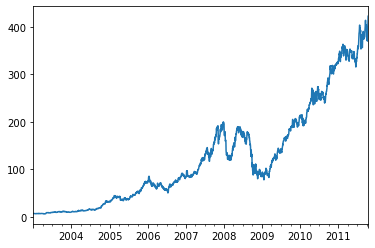

In [185]:
close_px_all = pd.read_csv("examples/stock_px.csv",
                           parse_dates=True, index_col=0)

close_px = close_px_all[["AAPL", "MSFT", "XOM"]]

close_px = close_px.resample("B").ffill()
close_px["AAPL"].plot()

In [227]:
plt.style.use("fivethirtyeight")

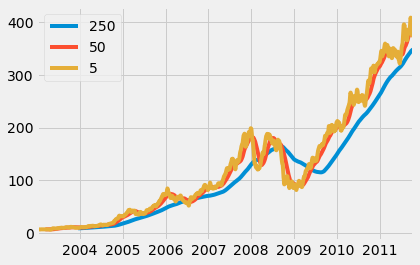

In [232]:
close_px["AAPL"].rolling(250).mean().plot(label="250")#250개씩 묶어서 그거의 평균을 낸 값

close_px["AAPL"].rolling(50).mean().plot(label="50")

close_px["AAPL"].rolling(5).mean().plot(label="5")

plt.legend()

In [188]:
std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std()

std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.013818
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot:>

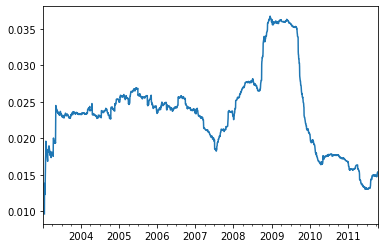

In [189]:
std250.plot()

In [191]:
import matplotlib.pyplot as plt

<AxesSubplot:>

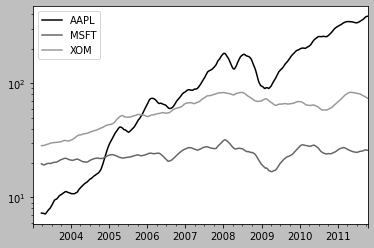

In [192]:
#The expanding mean starts the time window from the same point as the rolling window and increases the size of the window until it encompasses the whole series
expanding_mean = std250.expanding().mean()

plt.style.use('grayscale')
close_px.rolling(60).mean().plot(logy=True)

In [193]:
#rolling function also accepts a string indicating a fixed-size time offset rolling() in moving window functions rather than a set number of periods
close_px.rolling("20D").mean() 
#각 날짜를 구간의 끝으로하는 평균,, 1월2일부터 전에 20일인데 데이터가 없으니까 그냥 1월 2일 값. 1월 3일은 그전에 20일이니까 있는 데이터가 1월 2일+1월 3일 밖에 없어서 그 둘의 평균

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


###### 11.7.1 Exponentially Weighted Functions

<AxesSubplot:>

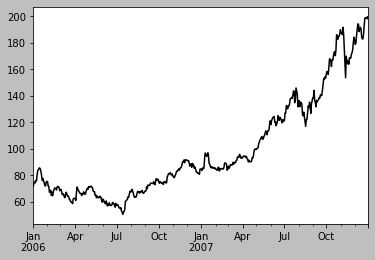

In [194]:
aapl_px = close_px["AAPL"]["2006":"2007"]

ma30 = aapl_px.rolling(30, min_periods=20).mean()

ewma30 = aapl_px.ewm(span=30).mean()

aapl_px.plot(style="k-", label="Price")

# 생각해오기 꼭.,,

<AxesSubplot:>

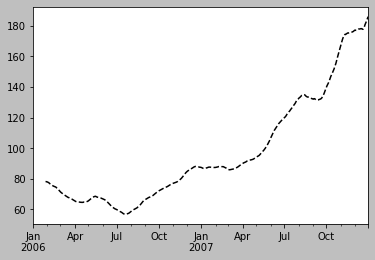

In [195]:
ma30.plot(style="k--", label="Simple Moving Avg")

<AxesSubplot:>

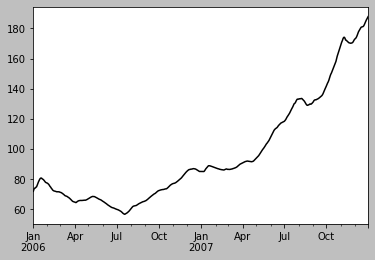

In [196]:
ewma30.plot(style="k-", label="EW MA")

No handles with labels found to put in legend.


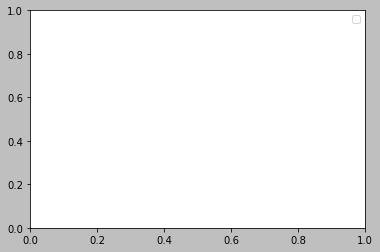

###### 11.7.2 Binary Moving Window Functions

In [198]:
spx_px = close_px_all["SPX"]

spx_rets = spx_px.pct_change()

returns = close_px.pct_change()

<AxesSubplot:>

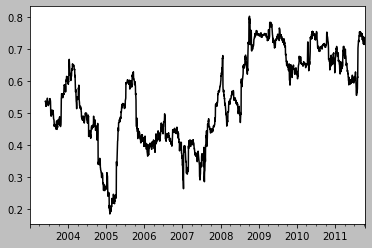

In [199]:
corr = returns["AAPL"].rolling(125, min_periods=100).corr(spx_rets)

corr.plot()

<AxesSubplot:>

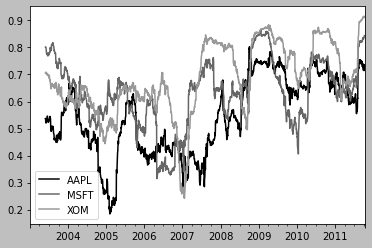

In [200]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

corr.plot()

###### 11.7.3 User-Defined Moving Window Functions

<AxesSubplot:>

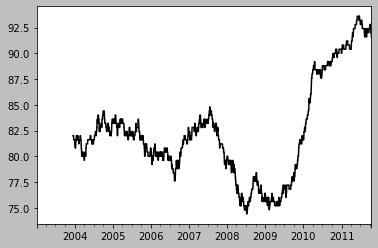

In [202]:
from scipy.stats import percentileofscore

def score_at_2percent(x):
    return percentileofscore(x, 0.02)

result = returns["AAPL"].rolling(250).apply(score_at_2percent)

result.plot()

In [203]:
conda install scipy

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
